In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image


In [ ]:
# path
train_data_dir = '/Users/gurnoorkhurana/Downloads/forest_fire/Training and Validation'
test_data_dir = '/Users/gurnoorkhurana/Downloads/forest_fire/Testing'

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create Data Generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,  # Same as train_data_dir
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Avoid shuffling for validation to match predictions
)


Found 1832 images belonging to 2 classes.
Found 1832 images belonging to 2 classes.


In [ ]:
# Building the CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-11-01 13:53:59.997838: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-01 13:53:59.997909: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-01 13:53:59.997934: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-01 13:53:59.998010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 13:53:59.998050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/30


2024-11-01 13:54:09.886661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 0.3380 - accuracy: 0.8672

2024-11-01 13:54:18.791854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 10s 115ms/step - loss: 0.3380 - accuracy: 0.8672 - val_loss: 0.1696 - val_accuracy: 0.9507
Epoch 2/30
57/57 [==============================] - 6s 96ms/step - loss: 0.1870 - accuracy: 0.9367 - val_loss: 0.1572 - val_accuracy: 0.9463
Epoch 3/30
57/57 [==============================] - 6s 97ms/step - loss: 0.1891 - accuracy: 0.9350 - val_loss: 0.1720 - val_accuracy: 0.9353
Epoch 4/30
57/57 [==============================] - 6s 96ms/step - loss: 0.1880 - accuracy: 0.9378 - val_loss: 0.1540 - val_accuracy: 0.9457
Epoch 5/30
57/57 [==============================] - 6s 97ms/step - loss: 0.1535 - accuracy: 0.9467 - val_loss: 0.1331 - val_accuracy: 0.9545
Epoch 6/30
57/57 [==============================] - 6s 97ms/step - loss: 0.1748 - accuracy: 0.9356 - val_loss: 0.1672 - val_accuracy: 0.9507
Epoch 7/30
57/57 [==============================] - 6s 96ms/step - loss: 0.1711 - accuracy: 0.9433 - val_loss: 0.1286 - val_accuracy: 0.9556
Epoch 8/30
57/57 [====

In [37]:
# Evaluate on Test Data
test_generator = validation_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc:.4f}')


Found 68 images belonging to 2 classes.
2/2 [==============================] - 0s 21ms/step - loss: 0.7344 - accuracy: 0.9062
Test Accuracy: 0.9062


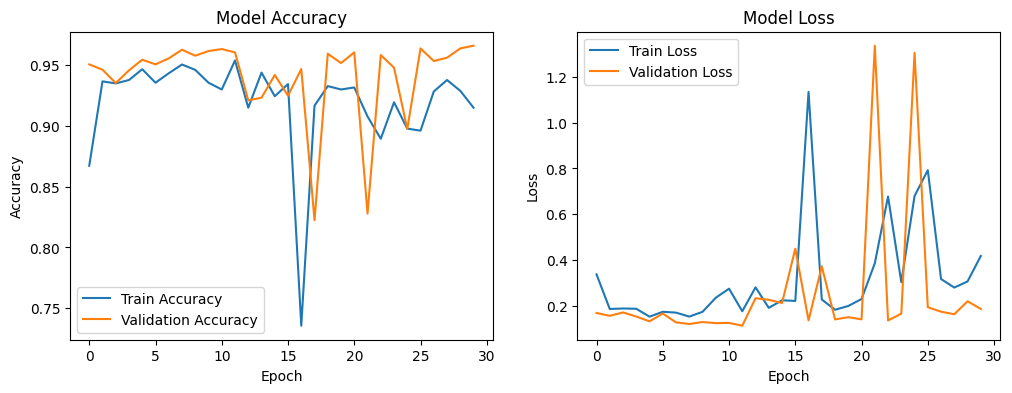

In [39]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
